## Lab 2

In [49]:
import pandas as pd
import numpy as np

In [50]:
data = pd.read_csv('./data/movie_statistic_dataset.csv')
data.head()

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
0,Avatar: The Way of Water,2022-12-09,"Action,Adventure,Fantasy",192.0,James Cameron,"writer,producer,director",1954,alive,7.8,277543.0,7.061101,460000000,667830256,2265935552
1,Avengers: Endgame,2019-04-23,"Action,Adventure,Drama",181.0,-,-,-,-,8.4,1143642.0,8.489533,400000000,858373000,2794731755
2,Pirates of the Caribbean: On Stranger Tides,2011-05-20,"Action,Adventure,Fantasy",137.0,Rob Marshall,"director,miscellaneous,producer",1960,alive,6.6,533763.0,6.272064,379000000,241071802,1045713802
3,Avengers: Age of Ultron,2015-04-22,"Action,Adventure,Sci-Fi",141.0,Joss Whedon,"writer,producer,director",1964,alive,7.3,870573.0,7.214013,365000000,459005868,1395316979
4,Avengers: Infinity War,2018-04-25,"Action,Adventure,Sci-Fi",149.0,-,-,-,-,8.4,1091968.0,8.460958,300000000,678815482,2048359754


In [51]:
data['production_date'] = pd.to_datetime(data['production_date'])
data['year'] = data['production_date'].dt.year
data.head()

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,year
0,Avatar: The Way of Water,2022-12-09,"Action,Adventure,Fantasy",192.0,James Cameron,"writer,producer,director",1954,alive,7.8,277543.0,7.061101,460000000,667830256,2265935552,2022
1,Avengers: Endgame,2019-04-23,"Action,Adventure,Drama",181.0,-,-,-,-,8.4,1143642.0,8.489533,400000000,858373000,2794731755,2019
2,Pirates of the Caribbean: On Stranger Tides,2011-05-20,"Action,Adventure,Fantasy",137.0,Rob Marshall,"director,miscellaneous,producer",1960,alive,6.6,533763.0,6.272064,379000000,241071802,1045713802,2011
3,Avengers: Age of Ultron,2015-04-22,"Action,Adventure,Sci-Fi",141.0,Joss Whedon,"writer,producer,director",1964,alive,7.3,870573.0,7.214013,365000000,459005868,1395316979,2015
4,Avengers: Infinity War,2018-04-25,"Action,Adventure,Sci-Fi",149.0,-,-,-,-,8.4,1091968.0,8.460958,300000000,678815482,2048359754,2018


In [52]:
data.keys()

Index(['movie_title', 'production_date', 'genres', 'runtime_minutes',
       'director_name', 'director_professions', 'director_birthYear',
       'director_deathYear', 'movie_averageRating', 'movie_numerOfVotes',
       'approval_Index', 'Production budget $', 'Domestic gross $',
       'Worldwide gross $', 'year'],
      dtype='object')

In [53]:
genre_cols = data['genres'].str.split(',', expand=True)
genre_cols.columns = [f'genre {i+1}' for i in range(genre_cols.shape[1])]

data = pd.concat([data, genre_cols], axis=1)
data.head()

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,year,genre 1,genre 2,genre 3
0,Avatar: The Way of Water,2022-12-09,"Action,Adventure,Fantasy",192.0,James Cameron,"writer,producer,director",1954,alive,7.8,277543.0,7.061101,460000000,667830256,2265935552,2022,Action,Adventure,Fantasy
1,Avengers: Endgame,2019-04-23,"Action,Adventure,Drama",181.0,-,-,-,-,8.4,1143642.0,8.489533,400000000,858373000,2794731755,2019,Action,Adventure,Drama
2,Pirates of the Caribbean: On Stranger Tides,2011-05-20,"Action,Adventure,Fantasy",137.0,Rob Marshall,"director,miscellaneous,producer",1960,alive,6.6,533763.0,6.272064,379000000,241071802,1045713802,2011,Action,Adventure,Fantasy
3,Avengers: Age of Ultron,2015-04-22,"Action,Adventure,Sci-Fi",141.0,Joss Whedon,"writer,producer,director",1964,alive,7.3,870573.0,7.214013,365000000,459005868,1395316979,2015,Action,Adventure,Sci-Fi
4,Avengers: Infinity War,2018-04-25,"Action,Adventure,Sci-Fi",149.0,-,-,-,-,8.4,1091968.0,8.460958,300000000,678815482,2048359754,2018,Action,Adventure,Sci-Fi


In [54]:
genres_ = list(data['genre 1']) + list(data['genre 2']) + list(data['genre 3'])

genres = set(genres_)
len(genres)

25

In [55]:
data.shape

(4380, 18)

In [56]:
data = data.drop(['movie_title', 'production_date', 'genres', 'director_professions', 'director_birthYear', 'director_deathYear'], axis=1)
data.head()

,runtime_minutes,director_name,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,year,genre 1,genre 2,genre 3
0,192.0,James Cameron,7.8,277543.0,7.061101,460000000,667830256,2265935552,2022,Action,Adventure,Fantasy
1,181.0,-,8.4,1143642.0,8.489533,400000000,858373000,2794731755,2019,Action,Adventure,Drama
2,137.0,Rob Marshall,6.6,533763.0,6.272064,379000000,241071802,1045713802,2011,Action,Adventure,Fantasy
3,141.0,Joss Whedon,7.3,870573.0,7.214013,365000000,459005868,1395316979,2015,Action,Adventure,Sci-Fi
4,149.0,-,8.4,1091968.0,8.460958,300000000,678815482,2048359754,2018,Action,Adventure,Sci-Fi


In [57]:
data = data[data['director_name'] != '-']

In [58]:
numerical_cols = ['runtime_minutes', 'movie_averageRating', 'movie_numerOfVotes', 'approval_Index', 'Production budget $', 'Domestic gross $', 'Worldwide gross $', 'year']
categorical_cols = ['director_name', 'genre 1', 'genre 2', 'genre 3']

C:\Users\Pendiente\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Pendiente\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Pendiente\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Pendiente\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

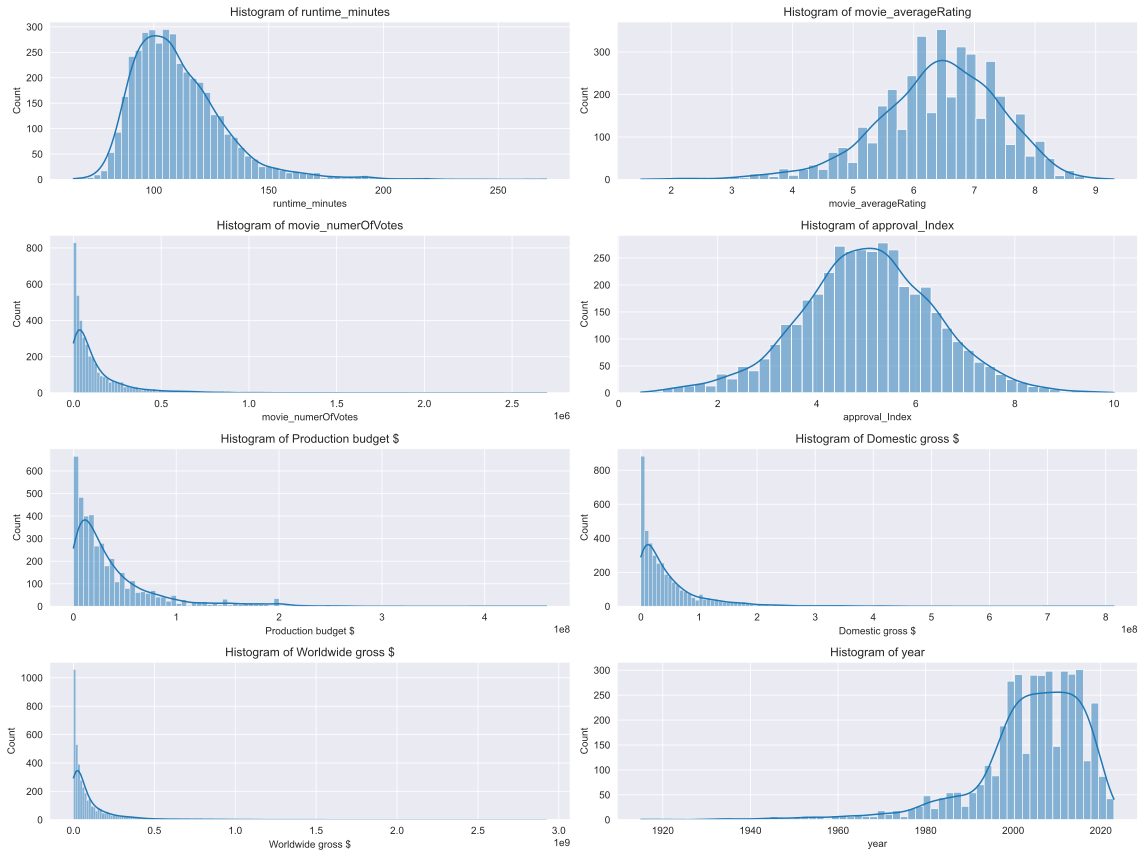

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))

# Histograms for numerical variables
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 2, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

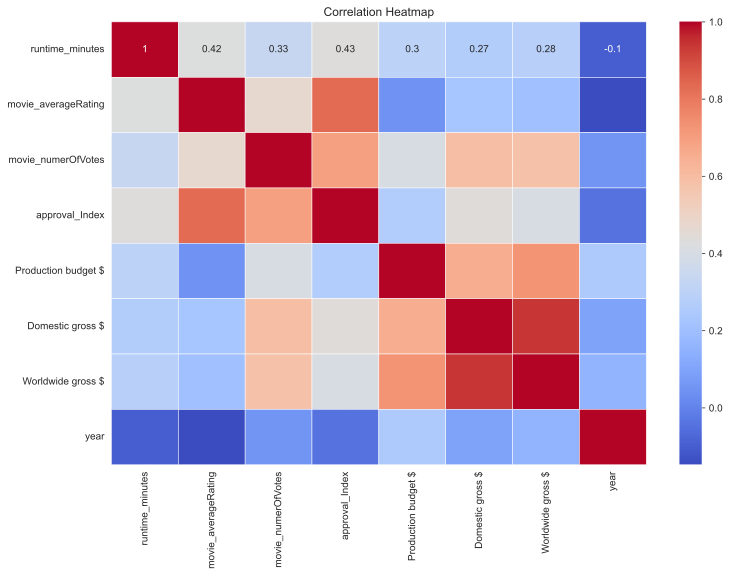

In [60]:
corr_matrix = data[numerical_cols].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Display the plot
plt.title('Correlation Heatmap')
plt.show()

In [61]:
data.head()

,runtime_minutes,director_name,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,year,genre 1,genre 2,genre 3
0,192.0,James Cameron,7.8,277543.0,7.061101,460000000,667830256,2265935552,2022,Action,Adventure,Fantasy
2,137.0,Rob Marshall,6.6,533763.0,6.272064,379000000,241071802,1045713802,2011,Action,Adventure,Fantasy
3,141.0,Joss Whedon,7.3,870573.0,7.214013,365000000,459005868,1395316979,2015,Action,Adventure,Sci-Fi
5,120.0,Zack Snyder,6.1,456977.0,5.717212,300000000,229024295,655945209,2017,Action,Adventure,Fantasy
6,148.0,Sam Mendes,6.8,445461.0,6.375644,300000000,200074175,879077344,2015,Action,Adventure,Thriller


In [62]:
data = data[data['genre 1'] != '\\N']

In [63]:
data['genre 1'].value_counts()

genre 1
Action         1147
Comedy         1017
Drama           725
Adventure       331
Biography       282
Crime           258
Horror          191
Documentary      34
Fantasy          25
Mystery          12
Animation        11
Thriller          5
Sci-Fi            4
Family            4
Musical           2
Film-Noir         2
Romance           1
Music             1
Western           1
Name: count, dtype: int64

In [64]:
def genre_indicator(row, genre):
    return genre in [row['genre 1']]

# Iterate through the genres list and create new columns
for genre in genres:
    data[genre] = data.apply(lambda row: genre_indicator(row, genre), axis=1)

In [65]:
data.head()

,runtime_minutes,director_name,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,year,genre 1,...,Action,Mystery,Sci-Fi,Thriller,Romance,Music,\N,Western,Crime,Adventure
0,192.0,James Cameron,7.8,277543.0,7.061101,460000000,667830256,2265935552,2022,Action,...,True,False,False,False,False,False,False,False,False,False
2,137.0,Rob Marshall,6.6,533763.0,6.272064,379000000,241071802,1045713802,2011,Action,...,True,False,False,False,False,False,False,False,False,False
3,141.0,Joss Whedon,7.3,870573.0,7.214013,365000000,459005868,1395316979,2015,Action,...,True,False,False,False,False,False,False,False,False,False
5,120.0,Zack Snyder,6.1,456977.0,5.717212,300000000,229024295,655945209,2017,Action,...,True,False,False,False,False,False,False,False,False,False
6,148.0,Sam Mendes,6.8,445461.0,6.375644,300000000,200074175,879077344,2015,Action,...,True,False,False,False,False,False,False,False,False,False


In [66]:
data = data.drop(['genre 1', 'genre 2', 'genre 3', None, '\\N'], axis=1)
data.head()

,runtime_minutes,director_name,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,year,Documentary,...,Horror,Action,Mystery,Sci-Fi,Thriller,Romance,Music,Western,Crime,Adventure
0,192.0,James Cameron,7.8,277543.0,7.061101,460000000,667830256,2265935552,2022,False,...,False,True,False,False,False,False,False,False,False,False
2,137.0,Rob Marshall,6.6,533763.0,6.272064,379000000,241071802,1045713802,2011,False,...,False,True,False,False,False,False,False,False,False,False
3,141.0,Joss Whedon,7.3,870573.0,7.214013,365000000,459005868,1395316979,2015,False,...,False,True,False,False,False,False,False,False,False,False
5,120.0,Zack Snyder,6.1,456977.0,5.717212,300000000,229024295,655945209,2017,False,...,False,True,False,False,False,False,False,False,False,False
6,148.0,Sam Mendes,6.8,445461.0,6.375644,300000000,200074175,879077344,2015,False,...,False,True,False,False,False,False,False,False,False,False


In [67]:
# data['approval_Index'] = data['approval_Index'].round(2)
# data['Production budget $'] = (data['Production budget $'] / 1000000).round(2)

In [68]:
data.describe()

,runtime_minutes,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,year
count,4053.000000,4053.000000,4.053000e+03,4053.000000,4.053000e+03,4.053000e+03,4.053000e+03,4053.00000
mean,110.434246,6.400222,1.342616e+05,5.027976,3.770507e+07,5.007030e+07,1.078765e+08,2003.87170
std,20.104759,1.015663,2.125648e+05,1.360631,4.452829e+07,7.090141e+07,1.863933e+08,13.03641
min,65.000000,1.500000,5.000000e+00,0.449597,5.000000e+04,2.640000e+02,4.230000e+02,1915.00000
25%,96.000000,5.800000,2.147300e+04,4.184392,1.000000e+07,8.355815e+06,1.280119e+07,1999.00000
50%,107.000000,6.500000,6.397300e+04,5.023304,2.250000e+07,2.729828e+07,4.249351e+07,2006.00000
75%,120.000000,7.100000,1.552290e+05,5.921866,5.000000e+07,6.173719e+07,1.211000e+08,2013.00000
max,271.000000,9.300000,2.695887e+06,10.000000,4.600000e+08,8.141151e+08,2.923706e+09,2023.00000


In [69]:
import tensorflow as tf
from tensorflow.keras import layers
from keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [70]:
le = LabelEncoder()
le.fit(data['director_name'])
data['director_name_e'] = le.transform(data['director_name'])
data.head()

,runtime_minutes,director_name,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,year,Documentary,...,Action,Mystery,Sci-Fi,Thriller,Romance,Music,Western,Crime,Adventure,director_name_e
0,192.0,James Cameron,7.8,277543.0,7.061101,460000000,667830256,2265935552,2022,False,...,True,False,False,False,False,False,False,False,False,664
2,137.0,Rob Marshall,6.6,533763.0,6.272064,379000000,241071802,1045713802,2011,False,...,True,False,False,False,False,False,False,False,False,1444
3,141.0,Joss Whedon,7.3,870573.0,7.214013,365000000,459005868,1395316979,2015,False,...,True,False,False,False,False,False,False,False,False,899
5,120.0,Zack Snyder,6.1,456977.0,5.717212,300000000,229024295,655945209,2017,False,...,True,False,False,False,False,False,False,False,False,1828
6,148.0,Sam Mendes,6.8,445461.0,6.375644,300000000,200074175,879077344,2015,False,...,True,False,False,False,False,False,False,False,False,1530


In [136]:
data['runtime_minutes'] = (data['runtime_minutes'] - data['runtime_minutes'].mean()) / data['runtime_minutes'].std()
data['approval_Index'] = (data['approval_Index'] - data['approval_Index'].mean()) / data['approval_Index'].std()
data['Production budget $'] = (data['Production budget $'] - data['Production budget $'].mean()) / data['Production budget $'].std()
data['Worldwide gross $'] = (data['Worldwide gross $'] - data['Worldwide gross $'].mean()) / data['Worldwide gross $'].std()
# data['year'] = (data['year'] - data['year'].mean()) / data['year'].std()
data['director_name_e'] = (data['director_name_e'] - data['director_name_e'].mean()) / data['director_name_e'].std()

In [137]:
X = data[['runtime_minutes', 'approval_Index', 'Production budget $', 'Worldwide gross $', 'director_name_e']]
# X = data[['runtime_minutes', 'approval_Index', 'Production budget $', 'year', 'director_name_e']]
# Convert DataFrame into np array
X = np.asarray(X)
y = data[['Action', 'War', 'Musical', 'Fantasy', 'Crime', 'Romance', 'News', 'Film-Noir', 'Horror', 'Animation', 'Comedy', 'History', 'Sport', 'Biography', 'Thriller', 'Sci-Fi', 'Documentary', 'Music', 'Family', 'Western', 'Mystery', 'Drama', 'Adventure']]
# Convert DataFrame into np array
y = np.asarray(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [138]:
y.shape

(4053, 23)

In [139]:
batched_model = tf.keras.Sequential([
    layers.InputLayer(shape=(5,)),
    layers.Dense(64, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(128, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(128, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(23, activation='softmax')
])

In [140]:
batched_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'], run_eagerly=True)

In [141]:
batched_history = batched_model.fit(X_train, y_train, epochs=100, batch_size=100, validation_split=0.2, verbose=2)

Epoch 1/100
26/26 - 3s - 120ms/step - accuracy: 0.1955 - loss: 3.0796 - val_accuracy: 0.4160 - val_loss: 2.9538
Epoch 2/100
26/26 - 4s - 159ms/step - accuracy: 0.3722 - loss: 2.4889 - val_accuracy: 0.3852 - val_loss: 2.7091
Epoch 3/100
26/26 - 2s - 80ms/step - accuracy: 0.3930 - loss: 2.2717 - val_accuracy: 0.3806 - val_loss: 2.4481
Epoch 4/100
26/26 - 2s - 81ms/step - accuracy: 0.4022 - loss: 2.1215 - val_accuracy: 0.3775 - val_loss: 2.2092
Epoch 5/100
26/26 - 3s - 99ms/step - accuracy: 0.4180 - loss: 2.0065 - val_accuracy: 0.3806 - val_loss: 2.0434
Epoch 6/100
26/26 - 3s - 100ms/step - accuracy: 0.4273 - loss: 1.8925 - val_accuracy: 0.3775 - val_loss: 1.9198
Epoch 7/100
26/26 - 3s - 101ms/step - accuracy: 0.4393 - loss: 1.8081 - val_accuracy: 0.3698 - val_loss: 1.8490
Epoch 8/100
26/26 - 3s - 101ms/step - accuracy: 0.4354 - loss: 1.7527 - val_accuracy: 0.3960 - val_loss: 1.7938
Epoch 9/100
26/26 - 2s - 80ms/step - accuracy: 0.4412 - loss: 1.6806 - val_accuracy: 0.3729 - val_loss: 1.7

In [142]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

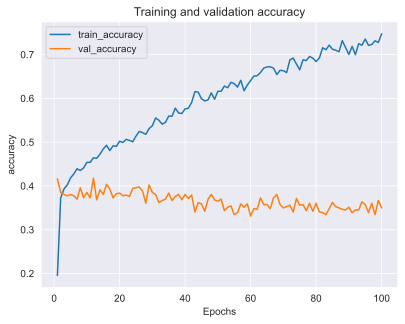

In [143]:
plot_metric(batched_history, 'accuracy')

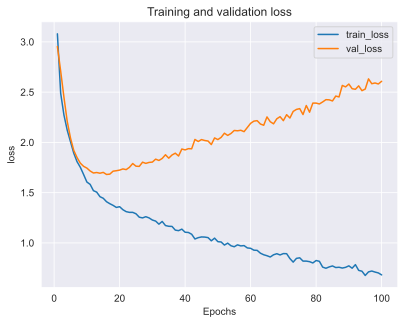

In [144]:
plot_metric(batched_history, 'loss')

In [145]:
dropout_model = tf.keras.Sequential([
    layers.InputLayer(shape=(5,)),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(23, activation='softmax')
])

In [146]:
dropout_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'], run_eagerly=True)

In [147]:
dropout_history = dropout_model.fit(X_train, y_train, epochs=100, batch_size=100, validation_split=0.2, verbose=2)

Epoch 1/100
26/26 - 1s - 50ms/step - accuracy: 0.1485 - loss: 2.9570 - val_accuracy: 0.3020 - val_loss: 2.6304
Epoch 2/100
26/26 - 1s - 52ms/step - accuracy: 0.2518 - loss: 2.4694 - val_accuracy: 0.3112 - val_loss: 2.1258
Epoch 3/100
26/26 - 3s - 99ms/step - accuracy: 0.2383 - loss: 2.2549 - val_accuracy: 0.4052 - val_loss: 2.0165
Epoch 4/100
26/26 - 3s - 102ms/step - accuracy: 0.2684 - loss: 2.1583 - val_accuracy: 0.3960 - val_loss: 1.9257
Epoch 5/100
26/26 - 1s - 53ms/step - accuracy: 0.2619 - loss: 2.0997 - val_accuracy: 0.4253 - val_loss: 1.8988
Epoch 6/100
26/26 - 1s - 54ms/step - accuracy: 0.2869 - loss: 2.0433 - val_accuracy: 0.4391 - val_loss: 1.8393
Epoch 7/100
26/26 - 1s - 54ms/step - accuracy: 0.2900 - loss: 2.0324 - val_accuracy: 0.4576 - val_loss: 1.8175
Epoch 8/100
26/26 - 1s - 53ms/step - accuracy: 0.2846 - loss: 1.9867 - val_accuracy: 0.4499 - val_loss: 1.7537
Epoch 9/100
26/26 - 3s - 100ms/step - accuracy: 0.2908 - loss: 1.9631 - val_accuracy: 0.4545 - val_loss: 1.7538

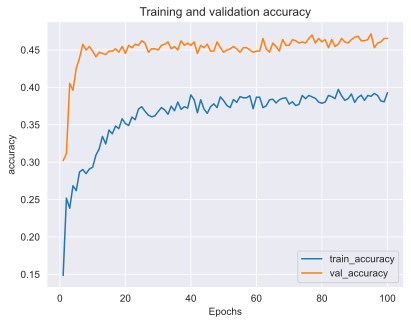

In [148]:
plot_metric(dropout_history, 'accuracy')

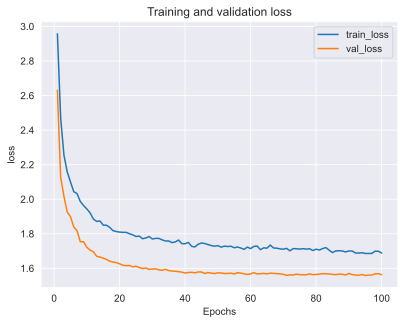

In [149]:
plot_metric(dropout_history, 'loss')

In [150]:
l1_model = tf.keras.Sequential([
    layers.InputLayer(shape=(5,)),
    layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l1(0.01)),
    layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l1(0.02)),
    layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l1(0.03)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.04)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.05)),
    layers.Dense(23, activation='softmax')
])

In [151]:
l1_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'], run_eagerly=True)

In [152]:
l1_history = l1_model.fit(X_train, y_train, epochs=100, batch_size=100, validation_split=0.2, verbose=2)

Epoch 1/100
26/26 - 1s - 53ms/step - accuracy: 0.2372 - loss: 92.3377 - val_accuracy: 0.3744 - val_loss: 77.8818
Epoch 2/100
26/26 - 1s - 46ms/step - accuracy: 0.3043 - loss: 66.0075 - val_accuracy: 0.3020 - val_loss: 53.8520
Epoch 3/100
26/26 - 1s - 47ms/step - accuracy: 0.2765 - loss: 44.2270 - val_accuracy: 0.3020 - val_loss: 34.5045
Epoch 4/100
26/26 - 1s - 47ms/step - accuracy: 0.2765 - loss: 27.1584 - val_accuracy: 0.3020 - val_loss: 19.8546
Epoch 5/100
26/26 - 1s - 50ms/step - accuracy: 0.2765 - loss: 14.7977 - val_accuracy: 0.3020 - val_loss: 9.9572
Epoch 6/100
26/26 - 1s - 50ms/step - accuracy: 0.2765 - loss: 7.1715 - val_accuracy: 0.3020 - val_loss: 4.7442
Epoch 7/100
26/26 - 1s - 47ms/step - accuracy: 0.2765 - loss: 3.6975 - val_accuracy: 0.3020 - val_loss: 2.7787
Epoch 8/100
26/26 - 1s - 48ms/step - accuracy: 0.2765 - loss: 2.4852 - val_accuracy: 0.3020 - val_loss: 2.1029
Epoch 9/100
26/26 - 1s - 48ms/step - accuracy: 0.2765 - loss: 2.1409 - val_accuracy: 0.3020 - val_loss:

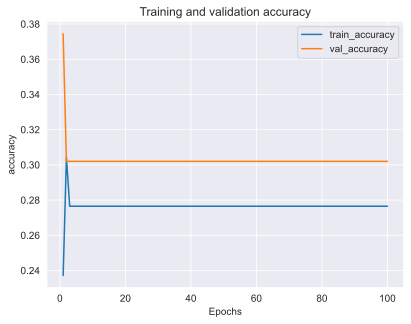

In [153]:
plot_metric(l1_history, 'accuracy')

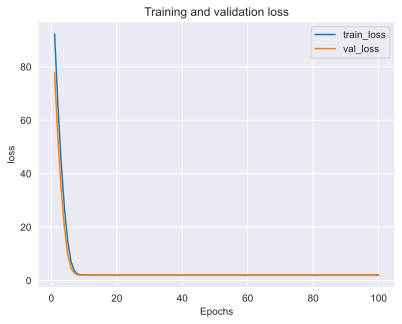

In [154]:
plot_metric(l1_history, 'loss')

In [155]:
model = tf.keras.Sequential([
    layers.InputLayer(shape=(5,)),
    layers.Dense(64, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(23, activation='softmax')
])

In [156]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'], run_eagerly=True)

In [157]:
model_history = model.fit(X_train, y_train, epochs=100, batch_size=100, validation_split=0.2, verbose=2)

Epoch 1/100
26/26 - 1s - 48ms/step - accuracy: 0.2526 - loss: 2.6383 - val_accuracy: 0.3205 - val_loss: 1.9380
Epoch 2/100
26/26 - 1s - 51ms/step - accuracy: 0.3563 - loss: 1.9624 - val_accuracy: 0.4468 - val_loss: 1.6983
Epoch 3/100
26/26 - 1s - 58ms/step - accuracy: 0.3857 - loss: 1.7773 - val_accuracy: 0.4561 - val_loss: 1.6295
Epoch 4/100
26/26 - 1s - 54ms/step - accuracy: 0.3930 - loss: 1.7317 - val_accuracy: 0.4792 - val_loss: 1.6197
Epoch 5/100
26/26 - 1s - 51ms/step - accuracy: 0.3941 - loss: 1.7110 - val_accuracy: 0.4515 - val_loss: 1.5935
Epoch 6/100
26/26 - 3s - 108ms/step - accuracy: 0.4003 - loss: 1.6922 - val_accuracy: 0.4545 - val_loss: 1.6091
Epoch 7/100
26/26 - 1s - 56ms/step - accuracy: 0.3961 - loss: 1.6822 - val_accuracy: 0.4422 - val_loss: 1.5847
Epoch 8/100
26/26 - 1s - 52ms/step - accuracy: 0.3941 - loss: 1.6797 - val_accuracy: 0.4792 - val_loss: 1.5638
Epoch 9/100
26/26 - 1s - 48ms/step - accuracy: 0.3976 - loss: 1.6660 - val_accuracy: 0.4576 - val_loss: 1.5830


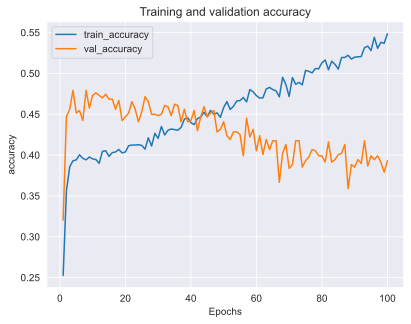

In [158]:
plot_metric(model_history, 'accuracy')

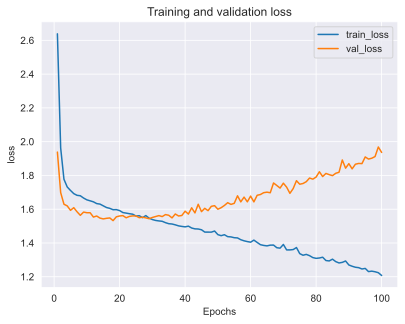

In [159]:
plot_metric(model_history, 'loss')

In [160]:
dropout_model_2 = tf.keras.Sequential([
    layers.InputLayer(shape=(5,)),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.25),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.25),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(23, activation='softmax')
])

In [161]:
dropout_model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'], run_eagerly=True)

In [162]:
dropout_history_2 = dropout_model_2.fit(X_train, y_train, epochs=100, batch_size=100, validation_split=0.2, verbose=2)

Epoch 1/100
26/26 - 1s - 56ms/step - accuracy: 0.1998 - loss: 2.7935 - val_accuracy: 0.3898 - val_loss: 2.0795
Epoch 2/100
26/26 - 2s - 64ms/step - accuracy: 0.2692 - loss: 2.2279 - val_accuracy: 0.4022 - val_loss: 1.8669
Epoch 3/100
26/26 - 2s - 95ms/step - accuracy: 0.2935 - loss: 2.0923 - val_accuracy: 0.4407 - val_loss: 1.8078
Epoch 4/100
26/26 - 1s - 56ms/step - accuracy: 0.3120 - loss: 1.9775 - val_accuracy: 0.4391 - val_loss: 1.7189
Epoch 5/100
26/26 - 2s - 68ms/step - accuracy: 0.3147 - loss: 1.9421 - val_accuracy: 0.4422 - val_loss: 1.7180
Epoch 6/100
26/26 - 2s - 68ms/step - accuracy: 0.3189 - loss: 1.9265 - val_accuracy: 0.4422 - val_loss: 1.6841
Epoch 7/100
26/26 - 2s - 83ms/step - accuracy: 0.3182 - loss: 1.8774 - val_accuracy: 0.4468 - val_loss: 1.6696
Epoch 8/100
26/26 - 3s - 115ms/step - accuracy: 0.3278 - loss: 1.8553 - val_accuracy: 0.4468 - val_loss: 1.6417
Epoch 9/100
26/26 - 2s - 59ms/step - accuracy: 0.3340 - loss: 1.8491 - val_accuracy: 0.4407 - val_loss: 1.6425


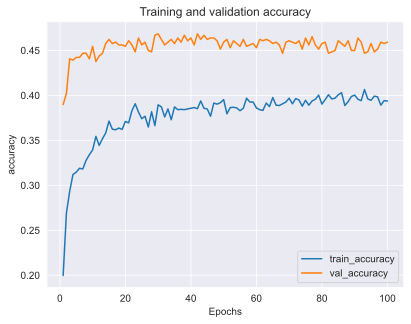

In [163]:
plot_metric(dropout_history_2, 'accuracy')

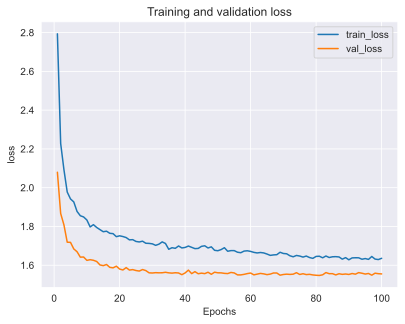

In [164]:
plot_metric(dropout_history_2, 'loss')